Query ”vacation” at Google’s trends website for Poland, United, States, and United Kingdom. Download search
results from 2004 to the present day. Import csv files. Perform the following tasks:

• Set datetime index for each dataframe.
• Rename columns using country codes (eg. PL) as headers.
• Combine the search counts in one dataframe.
• Present the time series for all countries in one plot.
• Generate descriptive statistics.
• Show three histograms in one plot.
• Show three kernel densities in one plot.

In [203]:
import pandas as pd

In [204]:
gb_df = pd.read_csv("gb_vac.csv")
pol_df = pd.read_csv("pol_vac.csv")
usa_df = pd.read_csv("usa_vac.csv")

Set datetime index for each dataframe.

In [205]:
gb_df["Month"]= pd.to_datetime(gb_df["Month"], format="%Y-%m")
gb_df.set_index("Month", inplace=True)

usa_df["Month"] = pd.to_datetime(usa_df["Month"], format="%Y-%m")
usa_df.set_index("Month", inplace=True)

pol_df["Month"]= pd.to_datetime(pol_df["Month"], format="%Y-%m")
pol_df.set_index("Month", inplace=True)

In [206]:
gb_df.index = gb_df.index.strftime("%Y-%m")
usa_df.index = usa_df.index.strftime("%Y-%m")
pol_df.index = pol_df.index.strftime("%Y-%m")

Rename columns using country codes (eg. PL) as headers.

In [207]:
usa_df.rename(columns={"vacation: (United States of America)": "USA"}, inplace=True)

gb_df.rename(columns={"vacation: (Great Britain)": "GB"}, inplace=True)

pol_df.rename(columns={"vacation: (Poland)": "PL"}, inplace=True)

Combine the search counts in one dataframe.

In [208]:
combined_df = pd.concat([gb_df, usa_df, pol_df], axis=1)

Present the time series for all countries in one plot.

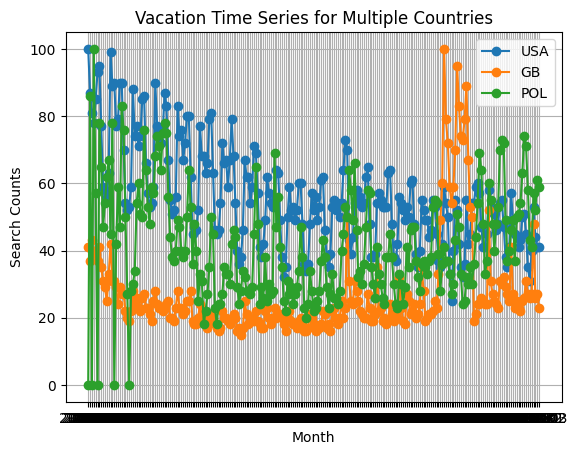

In [209]:
import matplotlib.pyplot as plt

plt.plot(usa_df.index, usa_df["USA"], label='USA', marker='o')
plt.plot(gb_df.index, gb_df["GB"], label='GB', marker='o')
plt.plot(pol_df.index, pol_df["PL"], label='POL', marker='o')

plt.title('Vacation Time Series for Multiple Countries')
plt.xlabel('Month')
plt.ylabel('Search Counts')
plt.legend()
plt.grid(True)
plt.show()


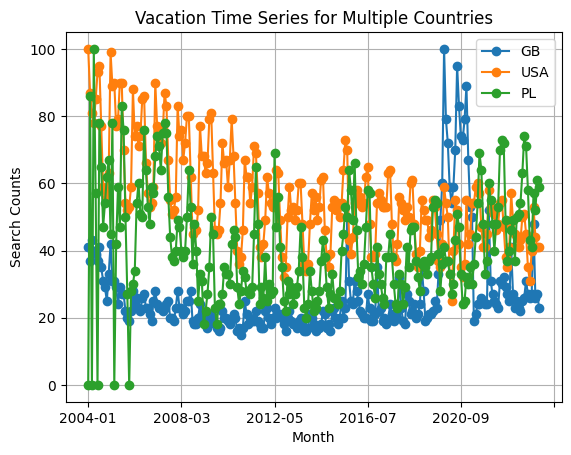

In [210]:
combined_df.plot(marker = 'o')
plt.title('Vacation Time Series for Multiple Countries')
plt.xlabel('Month')
plt.ylabel('Search Counts')
plt.legend()
plt.grid(True)

plt.show()


 Generate descriptive statistics.

In [211]:
print ("USA description")
print(usa_df.describe())
print ("\nPOL description")
print(pol_df.describe())
print ("\nGB description")
print(gb_df.describe())


USA description
              USA
count  243.000000
mean    56.032922
std     14.817030
min     25.000000
25%     46.000000
50%     54.000000
75%     63.000000
max    100.000000

POL description
               PL
count  243.000000
mean    41.440329
std     16.468337
min      0.000000
25%     29.000000
50%     38.000000
75%     51.000000
max    100.000000

GB description
               GB
count  243.000000
mean    26.967078
std     14.248639
min     15.000000
25%     20.000000
50%     23.000000
75%     27.000000
max    100.000000


 Show three histograms in one plot.

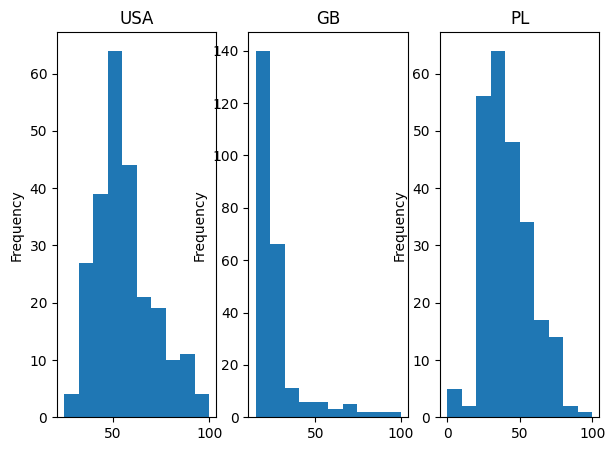

In [212]:

fig,axes = plt.subplots( nrows=1, ncols=3, figsize=(7, 5))

usa_df["USA"].plot(kind='hist', bins=10, ax=axes[0], title='USA')
gb_df["GB"].plot(kind='hist', bins=10, ax=axes[1], title='GB')
pol_df["PL"].plot(kind='hist', bins=10, ax=axes[2], title='PL')

plt.show()

Show three kernel densities in one plot

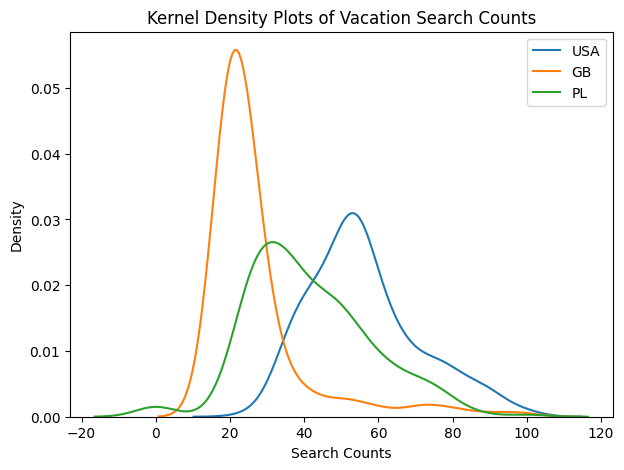

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(usa_df["USA"], label ="USA")
sns.kdeplot(gb_df["GB"], label ="GB")
sns.kdeplot(pol_df["PL"], label ="PL")

ax.set_title('Kernel Density Plots of Vacation Search Counts')
ax.set_xlabel('Searches')
ax.legend()

plt.show()